# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import load_dataset, create_datasets_matrices
from activation_functions import sigmoid
from model import Model
from deflected_subgradient_method import DeflectedSubgradientMethod

# Load Dataset

In [2]:
input_data, output_data = load_dataset("cup/ml-cup.csv", 20, 2, None)

print("Size of the input data:", input_data.shape)
print("Size of the output data:", output_data.shape)

Size of the input data: (1765, 20)
Size of the output data: (1765, 2)


We transform data from pandas format to matrices.

In [3]:
input_matrix, output_matrix=create_datasets_matrices(input_data, output_data, 100)

# Stampa le dimensioni per verifica
print("Size of the input matrix:", input_matrix.shape)  
print("Size of the output matrix:", output_matrix.shape)  

Size of the input matrix: (100, 20)
Size of the output matrix: (100, 2)


# Create Model

In [4]:
model = Model(X=input_matrix, Y=output_matrix, activation_function=sigmoid, k=400, seed=42)
hidden_output = model.hidden_layer()

print(hidden_output.shape)


(100, 400)


# Deflected Subgradient

In [5]:
DELTA = 0.1
RHO = 0.3
ERRE = 0.5
MAXITER = 100000

In [6]:
LAMBDA = 0.0001

In [7]:
hidden_output = np.hstack((hidden_output, np.ones((hidden_output.shape[0], 1))))

In [8]:
deflected = DeflectedSubgradientMethod(hidden_output, output_matrix, DELTA, RHO, ERRE, MAXITER, LAMBDA, 42)

0.59


In [9]:
x_opt = deflected.compute_deflected_subgradient()

In [10]:
value=deflected.objective_function(x_opt)

print(value)

2.101856989193528


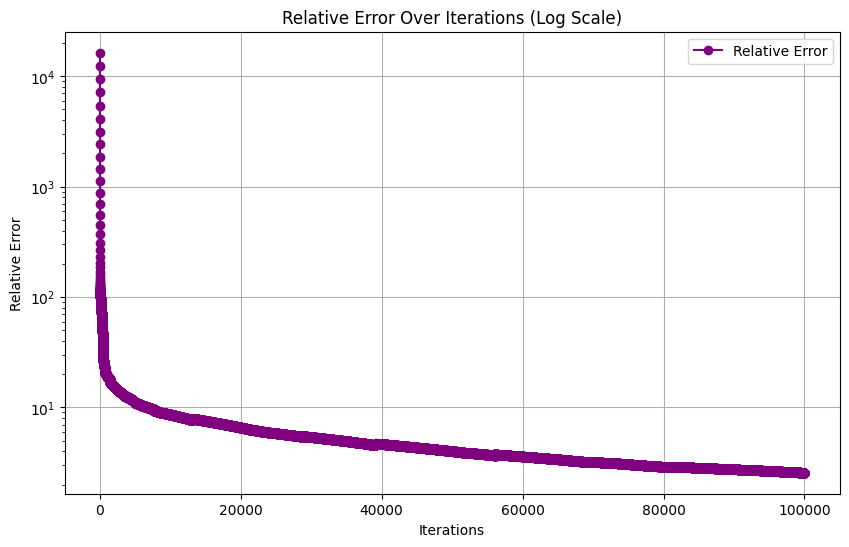

In [11]:
deflected.plot_relative_error(log_scale=True)

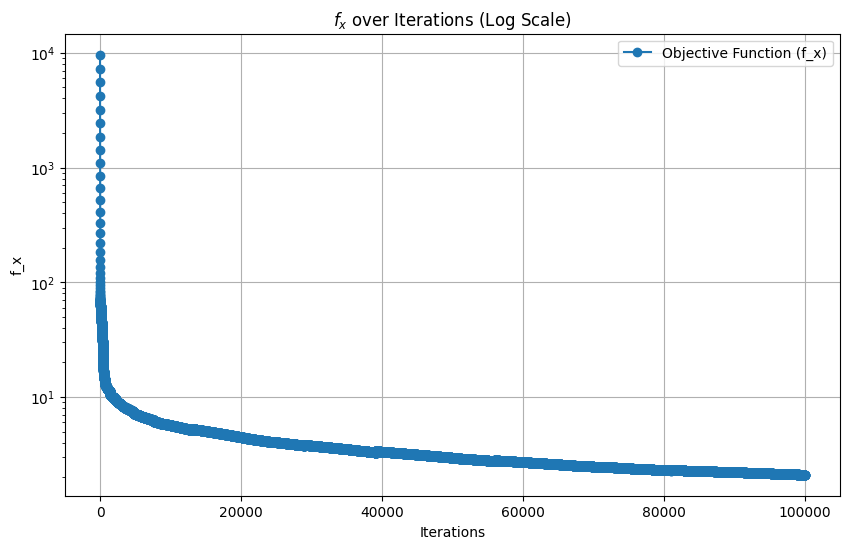

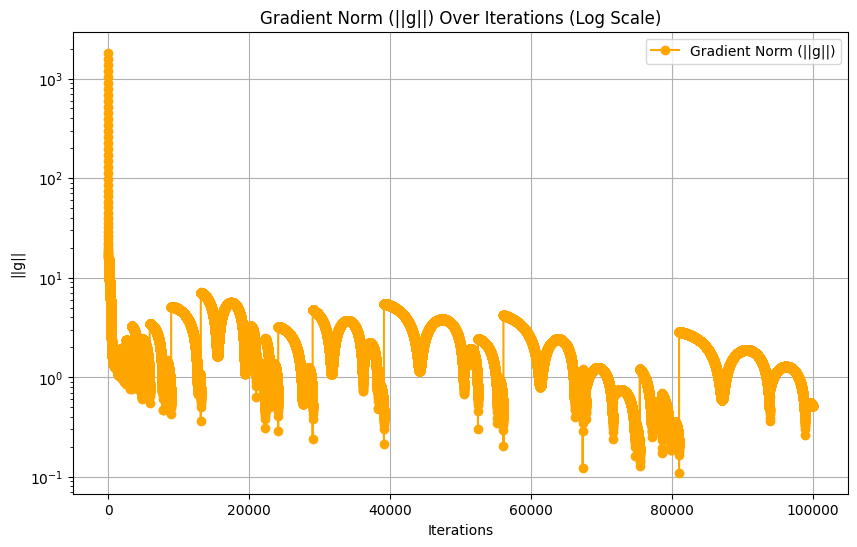

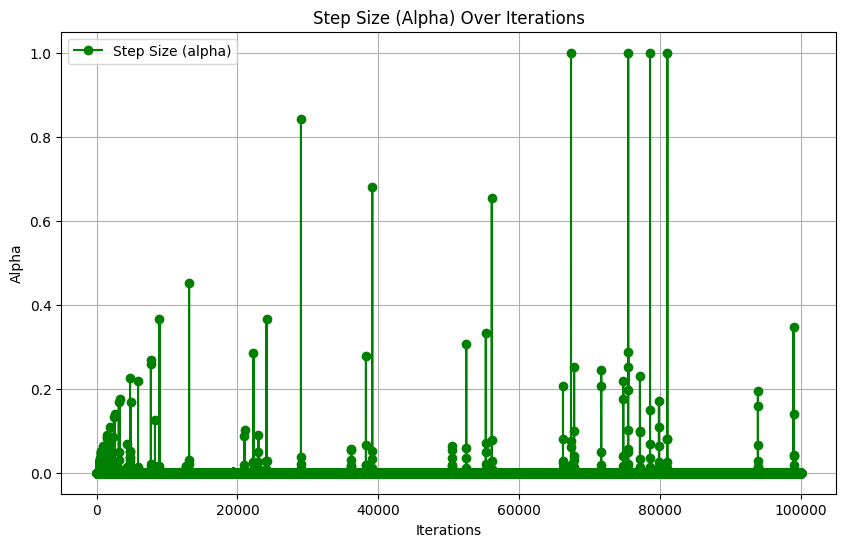

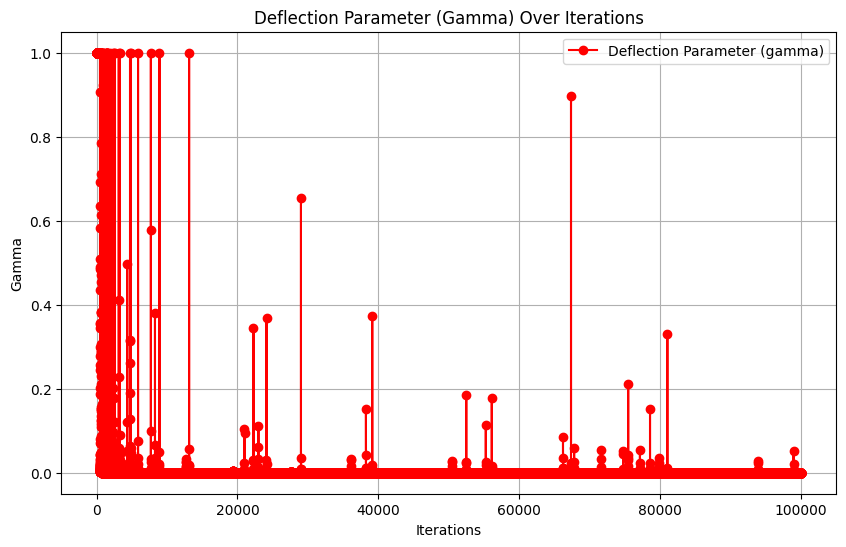

In [12]:
deflected.plot(log_scale=True)

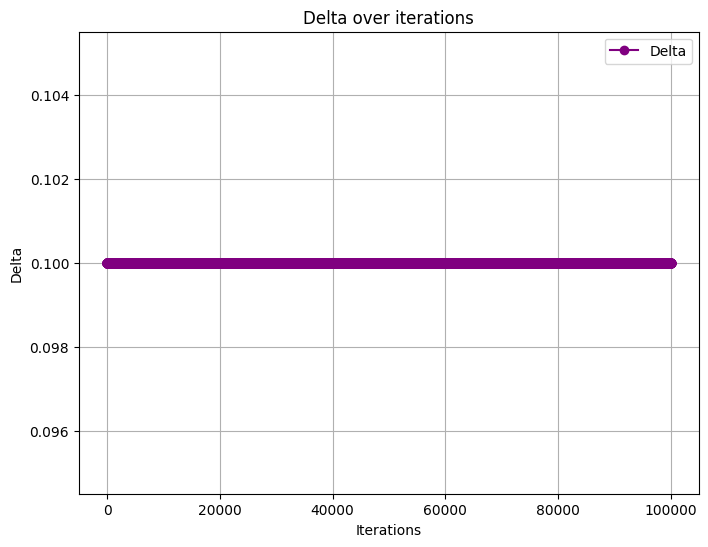

In [13]:
deflected.plot_delta()

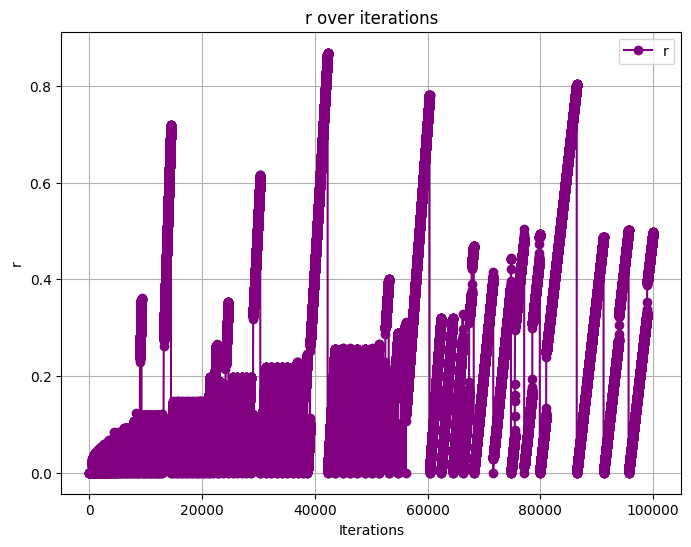

In [14]:
deflected.plot_r()